# Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.
<br/>
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing The Required Libraries:

In [510]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import os

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',100)

## 01. Data Reading,Understanding and Exploration

## Data Reading

### Reading the dataset from the file:

In [511]:
#Reading the CSV file
house_df=pd.read_csv('train.csv')


In [512]:
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [513]:
house_df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [514]:
#Checking the datatype
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [515]:
# Statistical summary of the data
house_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [516]:
#Checking the number of rows and columns
house_df.shape

(1460, 81)

#### There nearly 81 columns with 1460 rows.

# Data Understanding

#### Now we convert some of the numeric columns into categorical columns, since it would be more appropriate to be a categorical column.

In [517]:
for col in ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces']:
    house_df[col] = house_df[col].astype('object')

In [518]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 no

In [519]:
catg_var = list(house_df.select_dtypes(include=['object']).columns)
num_var = list(house_df.select_dtypes(include=['int64','float64']).columns)

In [520]:
len(catg_var)

54

In [521]:
len(num_var)

27

### Plotting the dependent Vs Target Variables:

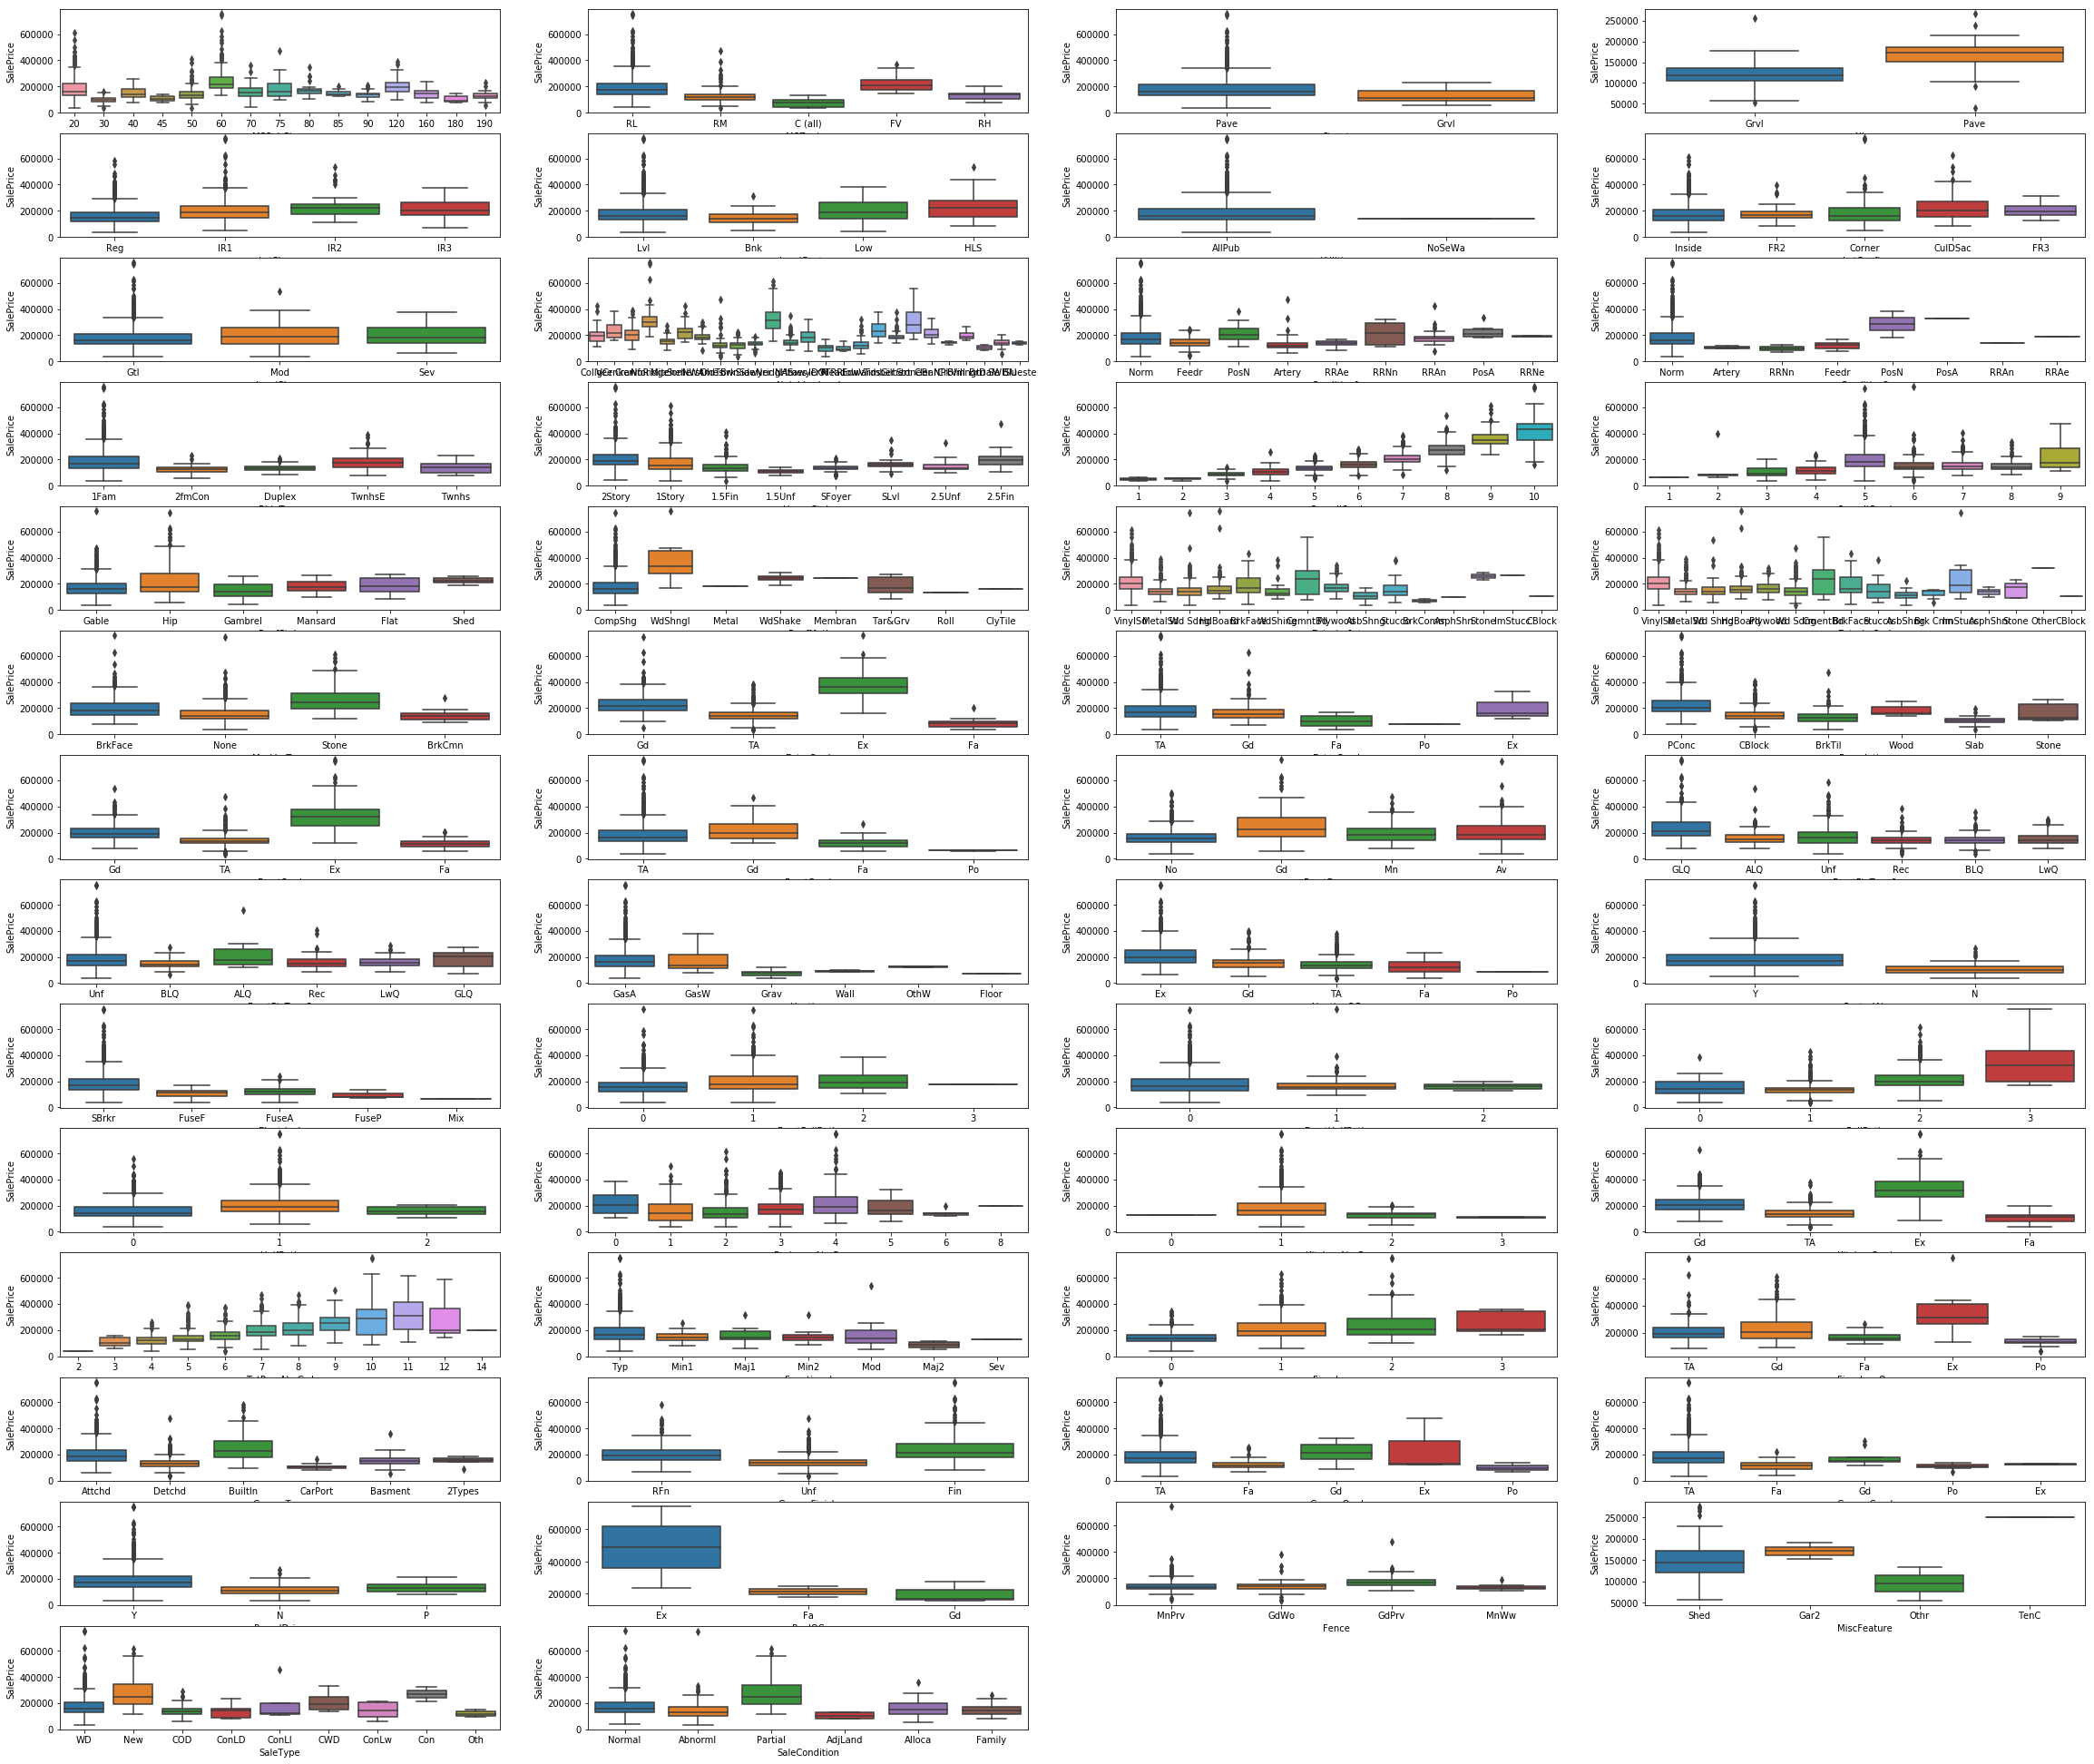

In [522]:
plt.figure(figsize=(40,50))
for i in enumerate(catg_var):
    ax=plt.subplot(20,4,i[0]+1)
    sns.boxplot(x=i[1],y='SalePrice',data=house_df)

## Step02 - Data Cleaning

The below are the steps followed in Data Cleaning:
    - Checking the missing values.
    - Removing the high null value columns
    - Imputing the missing values

In [523]:
# drop the id column since it is unique:
house_df.drop('Id',axis=1,inplace=True)

In [524]:
### checking % of missing values in each column
miss_var = list(house_df.columns[house_df.isnull().sum() >0])
print("% of missing values :")
print()
for i in range(len(miss_var)):
    percent = round(100*(house_df[miss_var[i]].isnull().sum()/house_df.shape[0]),2)
    
    print("{0} = {1}%".format(miss_var[i],percent))

% of missing values :

LotFrontage = 17.74%
Alley = 93.77%
MasVnrType = 0.55%
MasVnrArea = 0.55%
BsmtQual = 2.53%
BsmtCond = 2.53%
BsmtExposure = 2.6%
BsmtFinType1 = 2.53%
BsmtFinType2 = 2.6%
Electrical = 0.07%
FireplaceQu = 47.26%
GarageType = 5.55%
GarageYrBlt = 5.55%
GarageFinish = 5.55%
GarageQual = 5.55%
GarageCond = 5.55%
PoolQC = 99.52%
Fence = 80.75%
MiscFeature = 96.3%


### Dealing with the actual missing values:

In [525]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    house_df[col] = house_df[col].fillna('No Garage')

for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    house_df[col] = house_df[col].fillna(int(0))
    
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with No Basement
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    house_df[col] = house_df[col].fillna('No Basement')

#### There are few columns where NA means that the count of that feature is zero and it is not an actual missing value, so in such a case, we impute the value as No feature. Below features are hence imputed on this basis.

In [526]:

house_df['Alley'] = house_df['Alley'].fillna('No alley access')
house_df['FireplaceQu'] = house_df['FireplaceQu'].fillna('No Fireplace')
house_df['PoolQC'] = house_df['PoolQC'].fillna('No pool')
house_df['Fence'] = house_df['Fence'].fillna('No Fence')

house_df['MiscFeature'] = house_df['MiscFeature'].fillna('None')
house_df['MasVnrType'] = house_df['MasVnrType'].fillna('None')


house_df['MasVnrArea']=house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].median())
house_df['Electrical'] = house_df['Electrical'].fillna(house_df['Electrical']).mode()[0]
house_df['GarageYrBlt']=house_df['GarageYrBlt'].fillna(0)
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].astype(int)

In [527]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
house_df['LotFrontage'] = house_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [528]:
# Checking row wise missing values
house_df[house_df.isnull().sum(axis=1) >0]==True

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

Now there are no rows with missing values >0

In [529]:
### converting year into a derived metrics where the difference between that year and currrent year is calculated
import pandas as pd
import datetime
current_year = datetime.datetime.now().year #get current year
house_df['Current Year'] = datetime.datetime.now().year
house_df["YearsBuiltDiff"] = house_df['Current Year'] - house_df['YearBuilt']
house_df["YearRemodAddDiff"] = house_df['Current Year'] - house_df['YearRemodAdd']
house_df["YearSoldDiff"] = house_df['Current Year'] - house_df['YrSold']
house_df['GarageYrBltDiff'] = house_df['Current Year'] - house_df['GarageYrBlt']

Now that we have derived the difference years, we can delete the original columns

In [530]:
# Dropping original columns having  years
house_df.drop(['Current Year','YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True)
house_df

MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0            60       RL         65.0     8450   Pave  No alley access   
1            20       RL         80.0     9600   Pave  No alley access   
2            60       RL         68.0    11250   Pave  No alley access   
3            70       RL         60.0     9550   Pave  No alley access   
4            60       RL         84.0    14260   Pave  No alley access   
5            50       RL         85.0    14115   Pave  No alley access   
6            20       RL         75.0    10084   Pave  No alley access   
7            60       RL         80.0    10382   Pave  No alley access   
8            50       RM         51.0     6120   Pave  No alley access   
9           190       RL         50.0     7420   Pave  No alley access   
10           20       RL         70.0    11200   Pave  No alley access   
11           60       RL         85.0    11924   Pave  No alley access   
12           20       RL         71.0    12968   Pave  No alley access   
13           20       RL         91.0    10652   Pave  No alley access   
14           20       RL         73.0    10920   Pave  No alley access   
15           45       RM         51.0     6120   Pave  No alley access   
16           20       RL         73.0    11241   Pave  No alley access   
17           90       RL         72.0    10791   Pave  No alley access   
18           20       RL         66.0    13695   Pave  No alley access   
19           20       RL         70.0     7560   Pave  No alley access   
20           60       RL        101.0    14215   Pave  No alley access   
21           45       RM         57.0     7449   Pave             Grvl   
22           20       RL         75.0     9742   Pave  No alley access   
23          120       RM         44.0     4224   Pave  No alley access   
24           20       RL         71.0     8246   Pave  No alley access   
25           20       RL        110.0    14230   Pave  No alley access   
26           20       RL         60.0     7200   Pave  No alley access   
27           20       RL         98.0    11478   Pave  No alley access   
28           20       RL         47.0    16321   Pave  No alley access   
29           30       RM         60.0     6324   Pave  No alley access   
30           70  C (all)         50.0     8500   Pave             Pave   
31           20       RL         71.0     8544   Pave  No alley access   
32           20       RL         85.0    11049   Pave  No alley access   
33           20       RL         70.0    10552   Pave  No alley access   
34          120       RL         60.0     7313   Pave  No alley access   
35           60       RL        108.0    13418   Pave  No alley access   
36           20       RL        112.0    10859   Pave  No alley access   
37           20       RL         74.0     8532   Pave  No alley access   
38           20       RL         68.0     7922   Pave  No alley access   
39           90       RL         65.0     6040   Pave  No alley access   
40           20       RL         84.0     8658   Pave  No alley access   
41           20       RL        115.0    16905   Pave  No alley access   
42           85       RL         66.5     9180   Pave  No alley access   
43           20       RL         70.0     9200   Pave  No alley access   
44           20       RL         70.0     7945   Pave  No alley access   
45          120       RL         61.0     7658   Pave  No alley access   
46           50       RL         48.0    12822   Pave  No alley access   
47           20       FV         84.0    11096   Pave  No alley access   
48          190       RM         33.0     4456   Pave  No alley access   
49           20       RL         66.0     7742   Pave  No alley access   
...         ...      ...          ...      ...    ...              ...   
1410         60       RL         79.0    12420   Pave  No alley access   
1411         50       RL         80.0     9600   Pave  No alley access   
1412     

## Data Exploration

We will start the data exploration with inspecting the Target column.

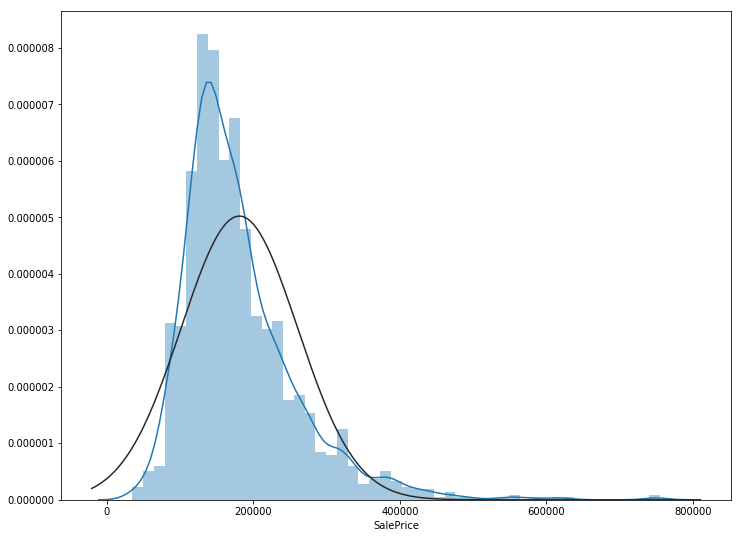

In [531]:
from scipy import stats
%matplotlib inline
plt.subplots(figsize=(12,9))
sns.distplot(house_df['SalePrice'], fit=stats.norm)

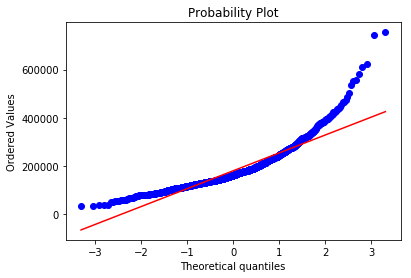

In [532]:
#Probablity plot
fig = plt.figure()
stats.probplot(house_df['SalePrice'], plot=plt)
plt.show()

This target variable is right skewed. Now, we need to tranform this variable and make it normal distribution.

Here we use log for target variable to make more normal distribution

In [533]:
#we use log function which is in numpy
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

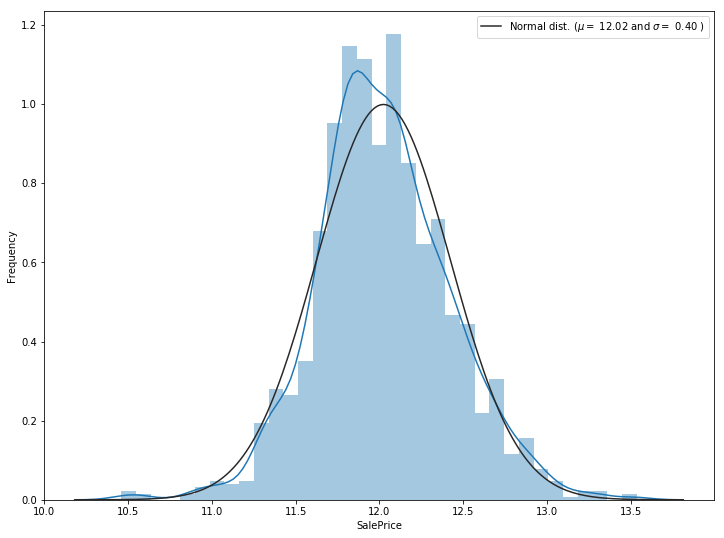

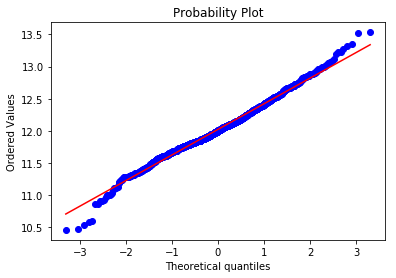

In [534]:
plt.subplots(figsize=(12,9))
sns.distplot(house_df['SalePrice'], fit=stats.norm)
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(house_df['SalePrice'])
# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
#Probablity plot
fig = plt.figure()
stats.probplot(house_df['SalePrice'], plot=plt)
plt.show()

In [535]:
house_numeric=house_df.select_dtypes(include=['int64','float64'])

In [536]:
house_numeric.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageCars  \
0          856       856       854             0       1710           2   
1         1262      1262         0             0       1262           2   
2          920       920       866             0       1786           2   
3          756       961       756             0       1717           3   
4         1145      1145      1053             0       2198           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  SalePrice  YearsBuiltDiff  YearRemodAddDiff  \
0         0        0       2  12.247699              17                17   
1         0        0       5  12.109016              44                44   
2         0        0       9  12.317171              19                18   
3         0        0       2  11.849405             105                50   
4         0        0      12  12.429220              20                20   

   YearSoldDiff  GarageYrBltDiff  
0            12               17  
1            13               44  
2            12               19  
3            14               22  
4            12               20

In [537]:
house_categorical=house_df.select_dtypes(exclude=['int64','float64'])

## Dealing with the Data Skewness. 

### We identify features having skewed data and remove them, sincec it doesnot contribute much to the data analysis.

In [538]:
for i in house_categorical.columns:
    print(i)
    print(house_categorical[i].value_counts(dropna=False))
    


MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley
No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    10

In [539]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = house_df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(house_df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

house_df.drop(columnsToBeRemoved, axis = 1, inplace = True)

house_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr   
1         20       RL         80.0     9600      Reg       FR2      Veenker   
2         60       RL         68.0    11250      IR1    Inside      CollgCr   
3         70       RL         60.0     9550      IR1    Corner      Crawfor   
4         60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle OverallQual OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story           7           5     Gable     VinylSd   
1     1Fam     1Story           6           8     Gable     MetalSd   
2     1Fam     2Story           7           5     Gable     VinylSd   
3     1Fam     2Story           7           5     Gable     Wd Sdng   
4     1Fam     2Story           8           5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ         706           0        150          856   
1           Gd          ALQ         978           0        284         1262   
2           Mn          GLQ         486           0        434          920   
3           No          ALQ         216           0        540          756   
4           Av          GLQ         655           0        490         1145   

  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea BsmtFullBath  \
0        Ex       856       854             0       1710            1   
1        Ex      1262         0             0       1262            0   
2        Ex       920       866             0       1786            1   
3        Gd       961       756             0       1717            1   
4        Ex      1145      1053             0       2198            1   

  FullBath HalfBath BedroomAbvGr KitchenQual TotRmsAbvGrd Fireplaces  \
0        2        1            3          Gd            8          0   
1        2        0            3          TA            6          1   
2        2        1            3          Gd            6          1   
3        1        0            3          Gd            7          1   
4        2        1            4          Gd            9          1   

    FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  WoodDeckSF  \
0  No Fireplace     Attchd          RFn           2         548           0   
1            TA     Attchd          RFn           2         460         298   
2            TA     Attchd          RFn           2         608           0   
3            Gd     Detchd          Unf           3         642           0   
4            TA     Attchd          RFn           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea     Fence  \
0           61              0          0            0         0  No Fence   
1            0              0          0            0         0  No Fence   
2           42              0          0            0         0  No Fence   
3           35            272          0            0         0  No Fence   
4           84              0          0            0         0  No Fence   

   MiscVal  MoSold SaleCondition  SalePrice  YearsBuiltDiff  YearRemodAddDiff  \
0        0       2        Normal  12.247699              17                17   
1        0       5        Normal  12.109016              44                44   
2        0       9        Normal  12.317171              19                18   
3        0       2       Abnorml  11.849405             105           

In [540]:
house_categorical=house_df.select_dtypes(exclude=['int64','float64'])

In [541]:
house_categorical.shape

(1460, 31)

As we can see, after the removal of skewed categorical columns, we get around 31 categorical columns. <br/>

Now we do the same for the numerical columns as well.

In [542]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = house_df.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house_df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
house_df.drop(columnsToBeRemoved, axis = 1, inplace = True)

house_df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr   
1         20       RL         80.0     9600      Reg       FR2      Veenker   
2         60       RL         68.0    11250      IR1    Inside      CollgCr   
3         70       RL         60.0     9550      IR1    Corner      Crawfor   
4         60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle OverallQual OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story           7           5     Gable     VinylSd   
1     1Fam     1Story           6           8     Gable     MetalSd   
2     1Fam     2Story           7           5     Gable     VinylSd   
3     1Fam     2Story           7           5     Gable     Wd Sdng   
4     1Fam     2Story           8           5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ         706        150          856        Ex   
1           Gd          ALQ         978        284         1262        Ex   
2           Mn          GLQ         486        434          920        Ex   
3           No          ALQ         216        540          756        Gd   
4           Av          GLQ         655        490         1145        Ex   

   1stFlrSF  2ndFlrSF  GrLivArea BsmtFullBath FullBath HalfBath BedroomAbvGr  \
0       856       854       1710            1        2        1            3   
1      1262         0       1262            0        2        0            3   
2       920       866       1786            1        2        1            3   
3       961       756       1717            1        1        0            3   
4      1145      1053       2198            1        2        1            4   

  KitchenQual TotRmsAbvGrd Fireplaces   FireplaceQu GarageType GarageFinish  \
0          Gd            8          0  No Fireplace     Attchd          RFn   
1          TA            6          1            TA     Attchd          RFn   
2          Gd            6          1            TA     Attchd          RFn   
3          Gd            7          1            Gd     Detchd          Unf   
4          Gd            9          1            TA     Attchd          RFn   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF     Fence  MoSold  \
0           2         548           0           61  No Fence       2   
1           2         460         298            0  No Fence       5   
2           2         608           0           42  No Fence       9   
3           3         642           0           35  No Fence       2   
4           3         836         192           84  No Fence      12   

  SaleCondition  SalePrice  YearsBuiltDiff  YearRemodAddDiff  YearSoldDiff  \
0        Normal  12.247699              17                17            12   
1        Normal  12.109016              44                44            13   
2        Normal  12.317171              19                18            12   
3       Abnorml  11.849405             105                50            14   
4        Normal  12.429220              20                20            12   

   GarageYrBltDiff  
0               17  
1               44  
2               19  
3               22  
4               20

In [543]:
house_numeric=house_df.select_dtypes(include=['int64','float64'])
house_numeric.head()


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450       196.0         706        150          856   
1         80.0     9600         0.0         978        284         1262   
2         68.0    11250       162.0         486        434          920   
3         60.0     9550         0.0         216        540          756   
4         84.0    14260       350.0         655        490         1145   

   1stFlrSF  2ndFlrSF  GrLivArea  GarageCars  GarageArea  WoodDeckSF  \
0       856       854       1710           2         548           0   
1      1262         0       1262           2         460         298   
2       920       866       1786           2         608           0   
3       961       756       1717           3         642           0   
4      1145      1053       2198           3         836         192   

   OpenPorchSF  MoSold  SalePrice  YearsBuiltDiff  YearRemodAddDiff  \
0           61       2  12.247699              17                17   
1            0       5  12.109016              44                44   
2           42       9  12.317171              19                18   
3           35       2  11.849405             105                50   
4           84      12  12.429220              20                20   

   YearSoldDiff  GarageYrBltDiff  
0            12               17  
1            13               44  
2            12               19  
3            14               22  
4            12               20

In [544]:
house_numeric.shape
house_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'Fence', 'MoSold', 'SaleCondition',
       'SalePrice', 'YearsBuiltDiff', 'YearRemodAddDiff', 'YearSoldDiff',
       'GarageYrBltDiff'],
      dtype='object')

Thus, after the removal, there are 20 numeric columns in total.
### Find the Correlation:

In [545]:
cor=house_df.corr()
cor

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
LotFrontage          1.000000  0.335957    0.195830    0.232576   0.119174   
LotArea              0.335957  1.000000    0.103321    0.214103  -0.002618   
MasVnrArea           0.195830  0.103321    1.000000    0.261256   0.113862   
BsmtFinSF1           0.232576  0.214103    0.261256    1.000000  -0.495251   
BsmtUnfSF            0.119174 -0.002618    0.113862   -0.495251   1.000000   
TotalBsmtSF          0.381038  0.260833    0.360067    0.522396   0.415360   
1stFlrSF             0.434109  0.299475    0.339850    0.445863   0.317987   
2ndFlrSF             0.075686  0.050986    0.173800   -0.137079   0.004469   
GrLivArea            0.385190  0.263116    0.388052    0.208171   0.240257   
GarageCars           0.281393  0.154871    0.361945    0.224054   0.214175   
GarageArea           0.339085  0.180403    0.370884    0.296970   0.183303   
WoodDeckSF           0.088736  0.171698    0.159991    0.204306  -0.005316   
OpenPorchSF          0.141734  0.084774    0.122528    0.111761   0.129005   
MoSold               0.007370  0.001205   -0.006723   -0.015727   0.034888   
SalePrice            0.353288  0.257320    0.426776    0.372023   0.221985   
YearsBuiltDiff      -0.120999 -0.014228   -0.311600   -0.249503  -0.149040   
YearRemodAddDiff    -0.084550 -0.013788   -0.176529   -0.128451  -0.181133   
YearSoldDiff        -0.004756  0.014261    0.008317   -0.014359   0.041258   
GarageYrBltDiff     -0.104865 -0.072599   -0.132696   -0.115843  -0.042720   

                  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageCars  \
LotFrontage          0.381038  0.434109  0.075686   0.385190    0.281393   
LotArea              0.260833  0.299475  0.050986   0.263116    0.154871   
MasVnrArea           0.360067  0.339850  0.173800   0.388052    0.361945   
BsmtFinSF1           0.522396  0.445863 -0.137079   0.208171    0.224054   
BsmtUnfSF            0.415360  0.317987  0.004469   0.240257    0.214175   
TotalBsmtSF          1.000000  0.819530 -0.174512   0.454868    0.434585   
1stFlrSF             0.819530  1.000000 -0.202646   0.566024    0.439317   
2ndFlrSF            -0.174512 -0.202646  1.000000   0.687501    0.183926   
GrLivArea            0.454868  0.566024  0.687501   1.000000    0.467247   
GarageCars           0.434585  0.439317  0.183926   0.467247    1.000000   
GarageArea           0.486665  0.489782  0.138347   0.468997    0.882475   
WoodDeckSF           0.232019  0.235459  0.092165   0.247433    0.226342   
OpenPorchSF          0.247264  0.211671  0.208026   0.330224    0.213569   
MoSold               0.013196  0.031372  0.035164   0.050240    0.040522   
SalePrice            0.612134  0.596981  0.319300   0.700927    0.680625   
YearsBuiltDiff      -0.391452 -0.281986 -0.010308  -0.199010   -0.537850   
YearRemodAddDiff    -0.291066 -0.240379 -0.140024  -0.287389   -0.420622   
YearSoldDiff         0.014969  0.013604  0.028700   0.036526    0.039117   
GarageYrBltDiff     -0.176359 -0.166642 -0.064402  -0.162543   -0.598005   

                  GarageArea  WoodDeckSF  OpenPorchSF    MoSold  SalePrice  \
LotFrontage         0.339085    0.088736     0.141734  0.007370   0.353288   
LotArea             0.180403    0.171698     0.084774  0.001205   0.257320   
MasVnrArea          0.370884    0.159991     0.122528 -0.006723   0.426776   
BsmtFinSF1          0.296970    0.204306     0.111761 -0.015727   0.372023   
BsmtUnfSF           0.183303   -0.005316     0.129005  0.034888   0.221985   
TotalBsmtSF         0.486665    0.232019     0.247264  0.013196   0.612134   
1stFlrSF            0.489782    0.235459     0.211671  0.031372   0.596981   
2ndFlrSF            0.138347    0.092165     0.208026  0.035164   0.319300   
GrLivArea           0.468997    0.247433     0.330224  0.050240   0.700927   
GarageCars          0.882475    0.226342     0.213569  0.040522   0.680625   
GarageArea          1.000000    0.224666     0.241435  0.027974   0.650888   


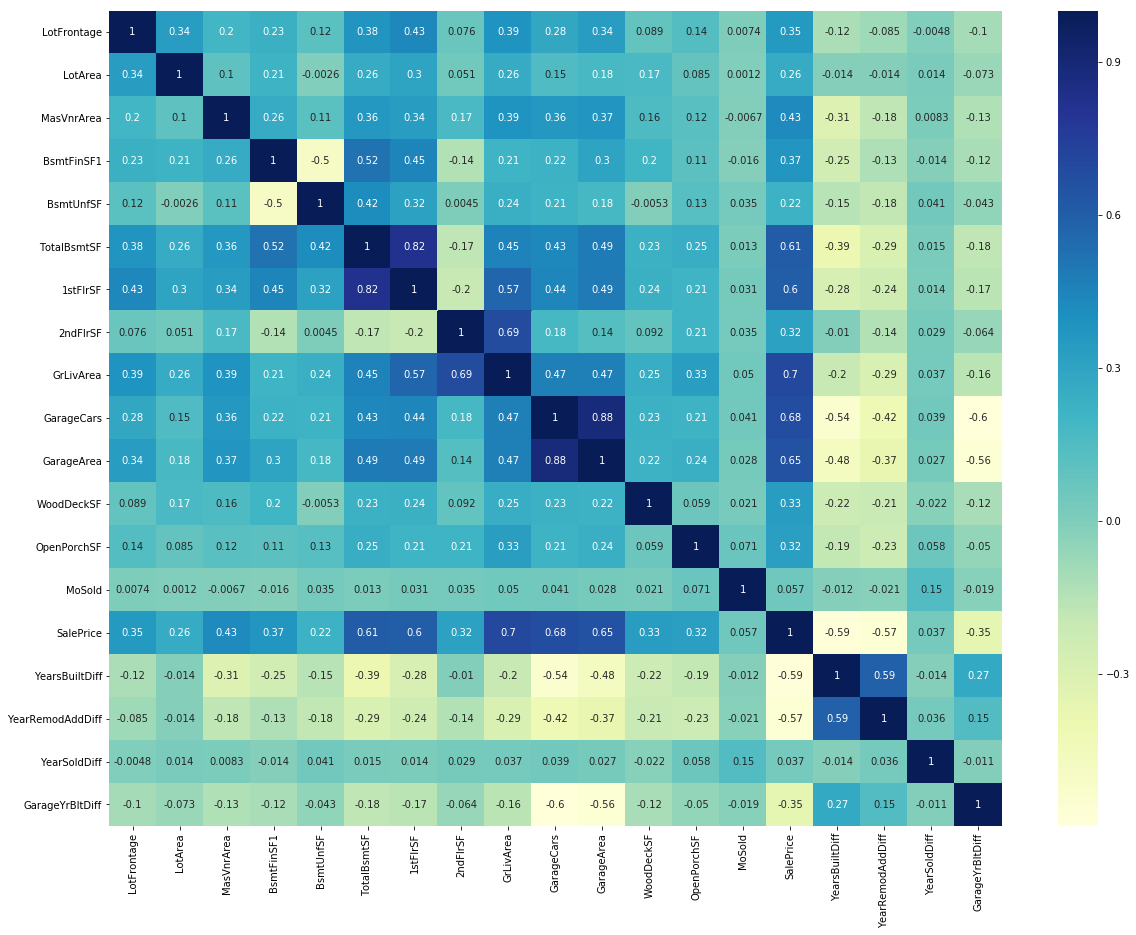

In [546]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


### The heatmap shows some useful insights:

#### Correlation of price with independent variables:
- Sale Price is highly (positively) correlated with $TotalBsmtSF,1stFlrSF,GrLivArea, GarageCars, GarageArea$

- Sale Price is highly(negatively) correlated with $YearBuiltDiff,YearRemodAddDiff$


#### Correlation among independent variables:
- Many independent variables are highly correlated : $TotalBsmtSF and 1stFlrSF, GarageCars and GarageArea, YearRemodAddDiff and YearsBuiltDiff$ are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## Dropping the highly correlated independent variables:

In [547]:
# Removing highly correlated multicollinear columns.
house_df = house_df.drop(['1stFlrSF','GarageCars','YearRemodAddDiff'], axis=1)

# Exploratory Data Analysis:

In [548]:
house_df.OverallQual.unique()

array([7, 6, 8, 5, 9, 4, 10, 3, 1, 2], dtype=object)

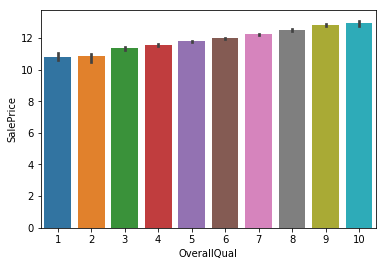

In [549]:
sns.barplot(house_df.OverallQual, house_df.SalePrice)

In [550]:

def univariate_continuous(df):
    
    numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    
    for col in numeric_cols:
    
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

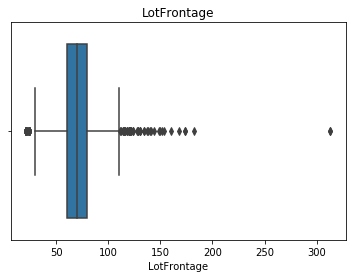

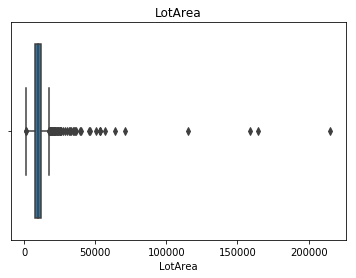

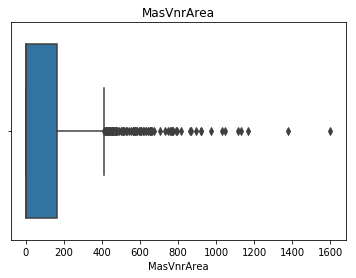

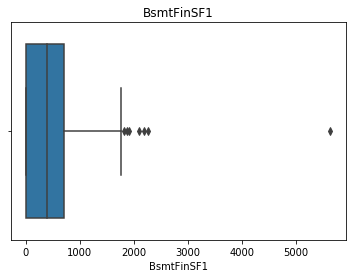

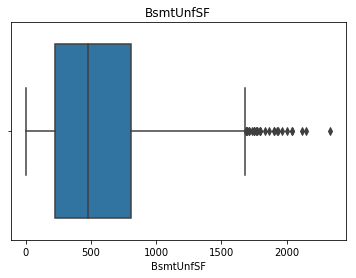

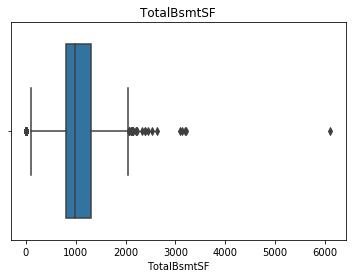

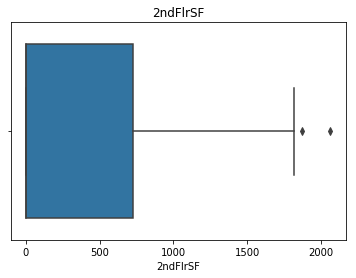

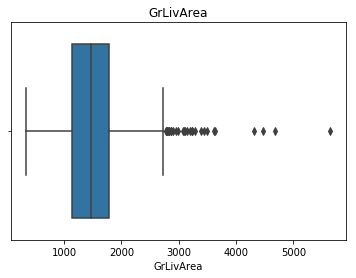

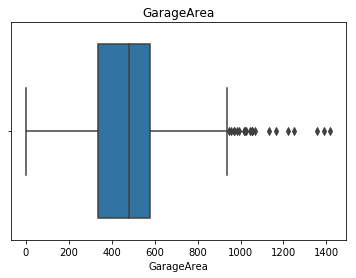

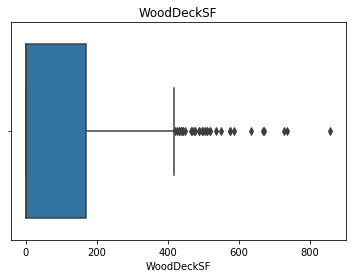

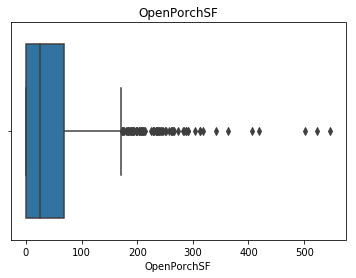

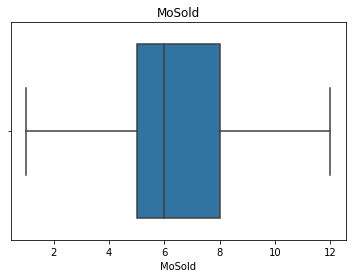

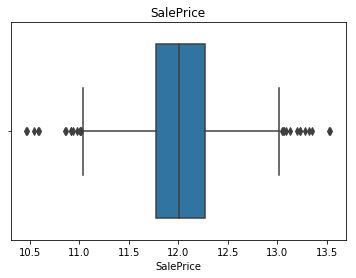

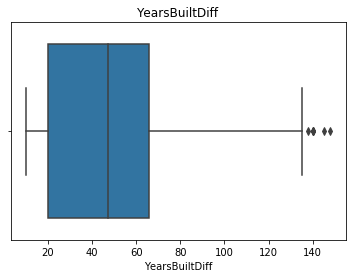

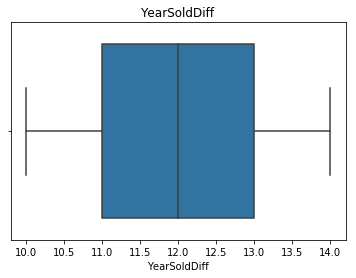

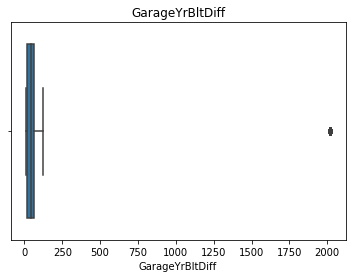

In [551]:
univariate_continuous(house_df)

In [552]:
def bivariate_continuous(df, target):

    numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64', 'uint8']]
    
    for col in numeric_cols:
        sns.regplot(x=col, y=target, data=df)
        plt.show()

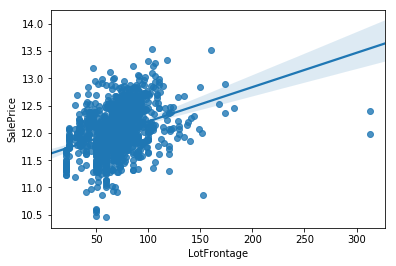

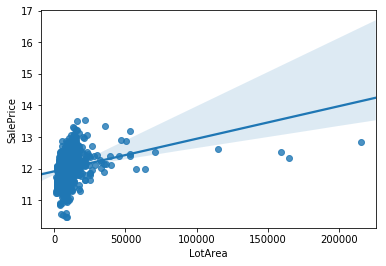

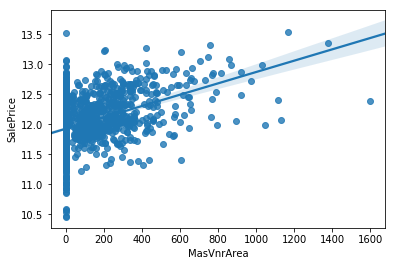

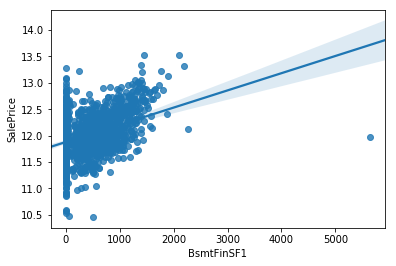

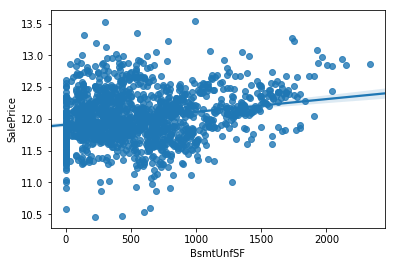

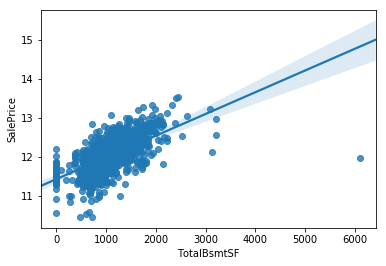

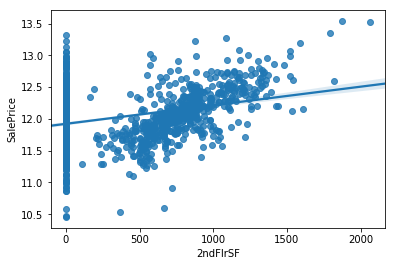

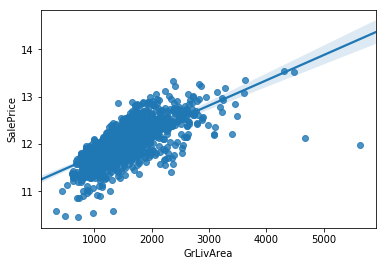

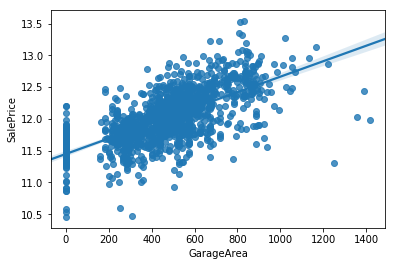

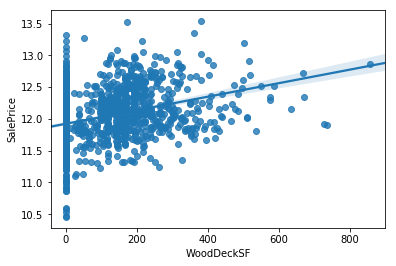

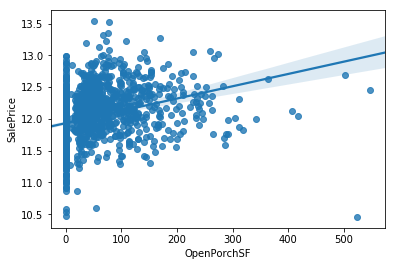

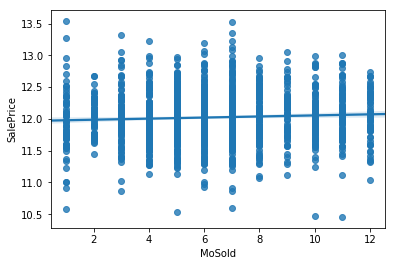

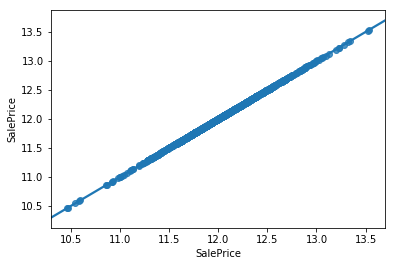

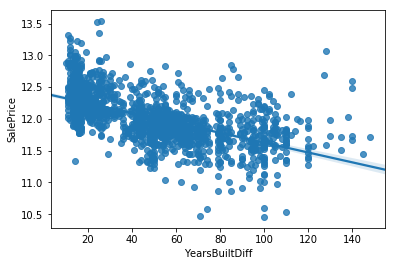

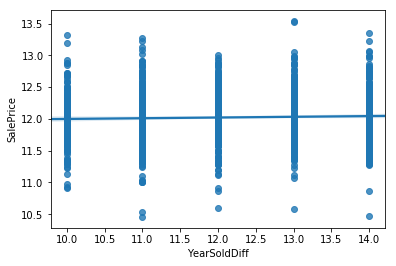

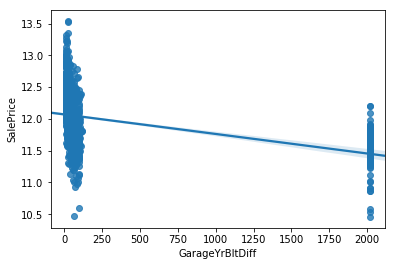

In [553]:
bivariate_continuous(house_df, 'SalePrice')

## Splitting data into X and y:

In [554]:
# Putting feature variable to X
X = house_df.drop(['SalePrice'], axis=1)

X.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr   
1         20       RL         80.0     9600      Reg       FR2      Veenker   
2         60       RL         68.0    11250      IR1    Inside      CollgCr   
3         70       RL         60.0     9550      IR1    Corner      Crawfor   
4         60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle OverallQual OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story           7           5     Gable     VinylSd   
1     1Fam     1Story           6           8     Gable     MetalSd   
2     1Fam     2Story           7           5     Gable     VinylSd   
3     1Fam     2Story           7           5     Gable     Wd Sdng   
4     1Fam     2Story           8           5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ         706        150          856        Ex   
1           Gd          ALQ         978        284         1262        Ex   
2           Mn          GLQ         486        434          920        Ex   
3           No          ALQ         216        540          756        Gd   
4           Av          GLQ         655        490         1145        Ex   

   2ndFlrSF  GrLivArea BsmtFullBath FullBath HalfBath BedroomAbvGr  \
0       854       1710            1        2        1            3   
1         0       1262            0        2        0            3   
2       866       1786            1        2        1            3   
3       756       1717            1        1        0            3   
4      1053       2198            1        2        1            4   

  KitchenQual TotRmsAbvGrd Fireplaces   FireplaceQu GarageType GarageFinish  \
0          Gd            8          0  No Fireplace     Attchd          RFn   
1          TA            6          1            TA     Attchd          RFn   
2          Gd            6          1            TA     Attchd          RFn   
3          Gd            7          1            Gd     Detchd          Unf   
4          Gd            9          1            TA     Attchd          RFn   

   GarageArea  WoodDeckSF  OpenPorchSF     Fence  MoSold SaleCondition  \
0         548           0           61  No Fence       2        Normal   
1         460         298            0  No Fence       5        Normal   
2         608           0           42  No Fence       9        Normal   
3         642           0           35  No Fence       2       Abnorml   
4         836         192           84  No Fence      12        Normal   

   YearsBuiltDiff  YearSoldDiff  GarageYrBltDiff  
0              17            12               17  
1              44            13               44  
2              19            12               19  
3             105            14               22  
4              20            12               20

In [555]:
#Take targate variable into y
y = house_df['SalePrice']

## Creating dummies for Categorical variables:

In [556]:
# convert into dummies
House_Dummies = pd.get_dummies(house_categorical, drop_first=True)
House_Dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   
4             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0                     0                    0   
4              0                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_NAmes  Neighborhoo

In [557]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [558]:
# concat dummy variables with X
X = pd.concat([X, House_Dummies], axis=1)

In [559]:
X.shape


(1460, 210)

#### After creating dummies, we get a total of 210 columns.

# Variable Scaling:

In [560]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       ...
       'GarageFinish_Unf', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw',
       'Fence_No Fence', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=210)

In [561]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## 3. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge regression:

In [562]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [563]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [564]:
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.027400         0.002400        -0.103472         -0.071390   
1       0.016999         0.003203        -0.103470         -0.071390   
2       0.014999         0.001001        -0.103445         -0.071390   
3       0.015603         0.000999        -0.103230         -0.071391   
4       0.026999         0.001999        -0.103035         -0.071405   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}               26          -0.104079   
1       0.001   {'alpha': 0.001}               25          -0.104079   
2        0.01    {'alpha': 0.01}               24          -0.104076   
3         0.1     {'alpha': 0.1}               23          -0.104043   
4         0.2     {'alpha': 0.2}               22          -0.104004   

   split0_train_score  split1_test_score  split1_train_score  \
0           -0.073060          -0.098240           -0.066283   
1           -0.073060          -0.098236           -0.066282   
2           -0.073058          -0.098195           -0.066280   
3           -0.073044          -0.097834           -0.066267   
4           -0.073039          -0.097507           -0.066287   

   split2_test_score  split2_train_score  split3_test_score  \
0          -0.110022           -0.068922          -0.098131   
1          -0.110018           -0.068922          -0.098126   
2          -0.109982           -0.068920          -0.098068   
3          -0.109673           -0.068909          -0.097627   
4          -0.109394           -0.068910          -0.097300   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0           -0.075103          -0.106912           -0.073582      0.011689   
1           -0.075104          -0.106914           -0.073582      0.005254   
2           -0.075107          -0.106925           -0.073583      0.002190   
3           -0.075131          -0.106996           -0.073606      0.002331   
4           -0.075152          -0.106995           -0.073635      0.010992   

   std_score_time  std_test_score  std_train_score  
0        0.002335        0.004710         0.003273  
1        0.003373        0.004711         0.003273  
2        0.000894        0.004725         0.003274  
3        0.000003        0.004833         0.003288  
4        0.001547        0.004908         0.003289

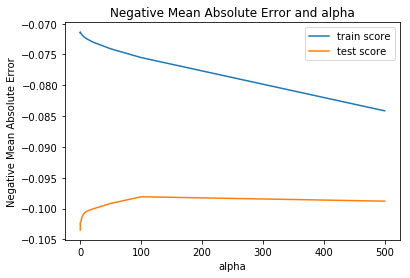

In [565]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [566]:
alpha =100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_



array([-2.08333298e-03,  1.33417381e-02,  2.23812872e-03,  1.51556941e-03,
        2.89459961e-03,  2.00738363e-02,  1.99663133e-02,  5.81441506e-02,
        3.41514862e-02,  1.28677111e-02,  9.87592825e-04,  1.06201433e-03,
       -3.01583243e-02,  2.71107410e-03, -5.83374082e-03, -2.22993609e-02,
       -8.00100944e-03, -3.43330027e-03, -4.57246181e-03, -1.17595711e-02,
        4.42091823e-03,  3.88818498e-03, -3.76666761e-03, -3.43542520e-03,
       -5.08094352e-03, -6.68278159e-03, -1.18931879e-02, -4.12253259e-03,
       -5.36703803e-03,  1.41356379e-02,  4.75156649e-03,  1.90796736e-02,
        6.79592514e-03,  4.79579577e-03, -4.98180681e-03,  3.98904670e-03,
        9.09128134e-03, -7.23725950e-03, -2.90511666e-03, -2.50480766e-03,
       -9.07022798e-04, -7.32151136e-03,  4.55484528e-03,  1.24301513e-02,
        1.66530143e-03,  2.28722209e-02, -2.01763016e-02,  1.30402605e-03,
       -1.39003941e-02, -1.63079188e-02, -1.26231336e-03, -3.83282970e-03,
       -8.87915064e-04, -

In [567]:

# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.021737123595870173

In [568]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(['Coefficient'])

Coefficient                  Features
12       -0.0302            YearsBuiltDiff
140      -0.0239               BsmtQual_TA
75       -0.0234             OverallQual_2
15       -0.0223             MSSubClass_30
150      -0.0223          BsmtFinType1_Unf
85       -0.0223             OverallCond_3
172      -0.0213            KitchenQual_TA
46       -0.0202      Neighborhood_Edwards
129      -0.0197              ExterQual_Fa
78       -0.0196             OverallQual_5
77       -0.0182             OverallQual_4
174      -0.0178            TotRmsAbvGrd_4
189      -0.0172  FireplaceQu_No Fireplace
138      -0.0167               BsmtQual_Gd
49       -0.0163      Neighborhood_MeadowV
86       -0.0152             OverallCond_4
200      -0.0152          GarageFinish_Unf
175      -0.0150            TotRmsAbvGrd_5
56       -0.0141      Neighborhood_OldTown
171      -0.0141            KitchenQual_Gd
48       -0.0139       Neighborhood_IDOTRR
181      -0.0135           TotRmsAbvGrd_11
87       -0.0123             OverallCond_5
26       -0.0119            MSSubClass_160
19       -0.0118             MSSubClass_60
170      -0.0115            KitchenQual_Fa
143      -0.0114           BsmtExposure_No
76       -0.0113             OverallQual_3
148      -0.0107  BsmtFinType1_No Basement
137      -0.0107               BsmtQual_Fa
139      -0.0107      BsmtQual_No Basement
144      -0.0102  BsmtExposure_No Basement
186      -0.0101              Fireplaces_3
173      -0.0100            TotRmsAbvGrd_3
66       -0.0100            BldgType_Twnhs
79       -0.0100             OverallQual_6
201      -0.0099                Fence_GdWo
158      -0.0086                FullBath_1
58       -0.0085       Neighborhood_Sawyer
16       -0.0080             MSSubClass_40
72       -0.0080         HouseStyle_2Story
182      -0.0077           TotRmsAbvGrd_12
190      -0.0076            FireplaceQu_Po
41       -0.0073       Neighborhood_BrDale
151      -0.0072              HeatingQC_Fa
154      -0.0072              HeatingQC_TA
37       -0.0072             LotConfig_FR2
25       -0.0067            MSSubClass_120
167      -0.0066            BedroomAbvGr_5
122      -0.0066        Exterior2nd_Stucco
..           ...                       ...
88        0.0060             OverallCond_6
183       0.0062           TotRmsAbvGrd_14
169       0.0062            BedroomAbvGr_8
135       0.0063          Foundation_Stone
123       0.0063       Exterior2nd_VinylSd
95        0.0067         RoofStyle_Mansard
132       0.0068         Foundation_CBlock
32        0.0068               MSZoning_RM
157       0.0074            BsmtFullBath_3
83        0.0082            OverallQual_10
36        0.0091         LotConfig_CulDSac
108       0.0092       Exterior1st_VinylSd
146       0.0092          BsmtFinType1_GLQ
69        0.0098         HouseStyle_1Story
184       0.0099              Fireplaces_1
179       0.0103            TotRmsAbvGrd_9
177       0.0104            TotRmsAbvGrd_7
178       0.0112            TotRmsAbvGrd_8
192       0.0112         GarageType_Attchd
159       0.0117                FullBath_2
43        0.0124      Neighborhood_ClearCr
9         0.0129                WoodDeckSF
90        0.0132             OverallCond_8
1         0.0133                   LotArea
80        0.0135             OverallQual_7
180       0.0138           TotRmsAbvGrd_10
29        0.0141               MSZoning_FV
99        0.0142       Exterior1st_BrkFace
185       0.0158              Fireplaces_2
133       0.0158          Foundation_PConc
61        0.0163      Neighborhood_StoneBr
91        0.0166             OverallCond_9
54        0.0173      Neighborhood_NoRidge
155       0.0173            BsmtFullBath_1
141       0.0185           BsmtExposure_Gd
31        0.0191               MSZoning_RL
60        0.0191      Neighborhood_Somerst
161       0.0198                HalfBath_1
208       0.0200      SaleCondition_Normal
6         0.0200                  2ndFlrSF
5         0.0201               TotalBsmtSF
209   

In [569]:

# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'2ndFlrSF': 0.02,
 'BedroomAbvGr_1': -0.0044,
 'BedroomAbvGr_2': 0.0003,
 'BedroomAbvGr_3': -0.005,
 'BedroomAbvGr_4': 0.0043,
 'BedroomAbvGr_5': -0.0066,
 'BedroomAbvGr_6': 0.0043,
 'BedroomAbvGr_8': 0.0062,
 'BldgType_2fmCon': -0.0053,
 'BldgType_Duplex': -0.0051,
 'BldgType_Twnhs': -0.01,
 'BldgType_TwnhsE': -0.0056,
 'BsmtExposure_Gd': 0.0185,
 'BsmtExposure_Mn': -0.0035,
 'BsmtExposure_No': -0.0114,
 'BsmtExposure_No Basement': -0.0102,
 'BsmtFinSF1': 0.0015,
 'BsmtFinType1_BLQ': -0.0013,
 'BsmtFinType1_GLQ': 0.0092,
 'BsmtFinType1_LwQ': -0.0024,
 'BsmtFinType1_No Basement': -0.0107,
 'BsmtFinType1_Rec': -0.0062,
 'BsmtFinType1_Unf': -0.0223,
 'BsmtFullBath_1': 0.0173,
 'BsmtFullBath_2': 0.0045,
 'BsmtFullBath_3': 0.0074,
 'BsmtQual_Fa': -0.0107,
 'BsmtQual_Gd': -0.0167,
 'BsmtQual_No Basement': -0.0107,
 'BsmtQual_TA': -0.0239,
 'BsmtUnfSF': 0.0029,
 'ExterQual_Fa': -0.0197,
 'ExterQual_Gd': 0.0046,
 'ExterQual_TA': -0.0065,
 'Exterior1st_AsphShn': 0.0005,
 'Exterior1st_BrkComm'

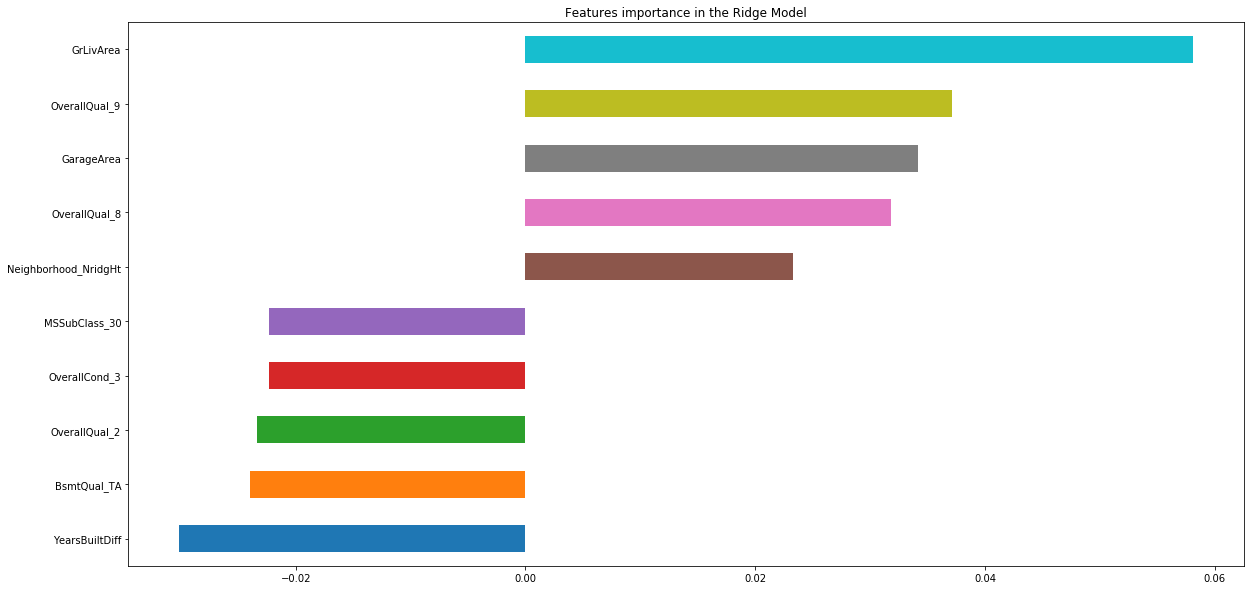

In [570]:
plt.figure(figsize=(20, 10))

coefs = pd.Series(ridge.coef_, index = X.columns)
imp_coefs = pd.concat([coefs.sort_values().head(),
                     coefs.sort_values().tail()])
imp_coefs.plot(kind = "barh")
plt.title("Features importance in the Ridge Model")
plt.show()

### Lasso

In [571]:
lasso = Lasso()


lasso_params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = lasso_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [572]:
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results_lasso[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
8        0.004         -0.077743        -0.094193                1
9        0.005         -0.079016        -0.094265                2
7        0.003         -0.076558        -0.094635                3
6        0.002         -0.075063        -0.095701                4
5        0.001         -0.073315        -0.097324                5
4       0.0005         -0.072465        -0.098005                6
10        0.01         -0.086972        -0.098085                7
3       0.0004         -0.072303        -0.098471                8
2       0.0003         -0.072112        -0.099060                9
1       0.0002         -0.071894        -0.099865               10
0       0.0001         -0.071659        -0.100993               11

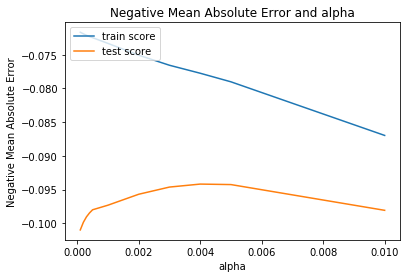

In [573]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [574]:

# get the best estimator for lambda

model_cv_lasso.best_estimator_

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [575]:
alpha =.004
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [576]:
lasso.coef_

array([-0.        ,  0.01236293,  0.        ,  0.        ,  0.        ,
        0.01708408,  0.        ,  0.11792606,  0.03709953,  0.00967995,
        0.        , -0.        , -0.0566853 ,  0.        , -0.00589397,
       -0.01717699, -0.00133696, -0.        , -0.        , -0.        ,
        0.00264074,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.00802597, -0.        , -0.00295198,  0.00126955,
        0.        ,  0.01117608, -0.        ,  0.00117408, -0.00364869,
        0.        ,  0.00731258, -0.        , -0.        , -0.        ,
       -0.        , -0.00243981,  0.        ,  0.0105627 ,  0.        ,
        0.02321392, -0.01836532,  0.        , -0.0123108 , -0.01476111,
       -0.        , -0.        ,  0.        , -0.        ,  0.01052646,
        0.02120968, -0.00960835,  0.        , -0.00530712,  0.        ,
        0.0214794 ,  0.00701529,  0.        ,  0.00236131, -0.        ,
       -0.        , -0.01030403, -0.00236962, -0.        ,  0.00

In [577]:

# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.021283129073191638

In [578]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(['Coefficient'])

Coefficient                  Features
5       -0.0567            YearsBuiltDiff
90      -0.0267  FireplaceQu_No Fireplace
41      -0.0229             OverallCond_3
55      -0.0202              ExterQual_Fa
33      -0.0202             OverallQual_2
20      -0.0184      Neighborhood_Edwards
42      -0.0179             OverallCond_4
84      -0.0177           TotRmsAbvGrd_11
7       -0.0172             MSSubClass_30
65      -0.0165          BsmtFinType1_Unf
43      -0.0165             OverallCond_5
22      -0.0148      Neighborhood_MeadowV
85      -0.0146           TotRmsAbvGrd_12
88      -0.0127              Fireplaces_3
21      -0.0123       Neighborhood_IDOTRR
80      -0.0109            TotRmsAbvGrd_4
35      -0.0105             OverallQual_4
56      -0.0105              ExterQual_TA
30      -0.0103            BldgType_Twnhs
58      -0.0099      BsmtQual_No Basement
94      -0.0098          GarageFinish_Unf
25      -0.0096      Neighborhood_OldTown
78      -0.0088            KitchenQual_TA
81      -0.0086            TotRmsAbvGrd_5
62      -0.0085  BsmtExposure_No Basement
10      -0.0080            MSSubClass_160
68      -0.0074              HeatingQC_TA
95      -0.0064                Fence_GdWo
34      -0.0063             OverallQual_3
71      -0.0060                FullBath_1
6       -0.0059           GarageYrBltDiff
26      -0.0053       Neighborhood_Sawyer
91      -0.0052            FireplaceQu_Po
79      -0.0050            TotRmsAbvGrd_3
36      -0.0049             OverallQual_5
93      -0.0045        GarageType_CarPort
50      -0.0044       Exterior1st_BrkComm
77      -0.0041            KitchenQual_Fa
66      -0.0038              HeatingQC_Fa
15      -0.0036              LotShape_IR3
52      -0.0035        Exterior2nd_Stucco
75      -0.0034            BedroomAbvGr_5
11      -0.0030            MSSubClass_190
61      -0.0028           BsmtExposure_No
17      -0.0024       Neighborhood_BrDale
31      -0.0024           BldgType_TwnhsE
59      -0.0018               BsmtQual_TA
47      -0.0018           RoofStyle_Gable
74      -0.0015            BedroomAbvGr_1
8       -0.0013             MSSubClass_40
64      -0.0010          BsmtFinType1_Rec
54      -0.0009       Exterior2nd_Wd Shng
67      -0.0007              HeatingQC_Po
86       0.0004           TotRmsAbvGrd_14
82       0.0006            TotRmsAbvGrd_7
49       0.0008            RoofStyle_Shed
14       0.0012              LotShape_IR2
12       0.0013               MSZoning_FV
83       0.0019           TotRmsAbvGrd_10
29       0.0024      Neighborhood_Veenker
9        0.0026             MSSubClass_70
89       0.0029            FireplaceQu_Gd
48       0.0030         RoofStyle_Mansard
76       0.0035            BedroomAbvGr_8
70       0.0045            BsmtFullBath_3
32       0.0059         HouseStyle_1Story
28       0.0070      Neighborhood_StoneBr
16       0.0073         LotConfig_CulDSac
53       0.0088       Exterior2nd_VinylSd
40       0.0092            OverallQual_10
87       0.0092              Fireplaces_2
73       0.0093                HalfBath_1
63       0.0094          BsmtFinType1_GLQ
4        0.0097                WoodDeckSF
51       0.0104       Exterior1st_BrkFace
23       0.0105      Neighborhood_NoRidge
18       0.0106      Neighborhood_ClearCr
92       0.0108         GarageType_Attchd
45       0.0109             OverallCond_8
13       0.0112               MSZoning_RL
57       0.0112          Foundation_PConc
46       0.0116             OverallCond_9
0        0.0124                   LotArea
96       0.0125      SaleCondition_Normal
72       0.0141                FullBath_3
69       0.0160            BsmtFullBath_1
97       0.0162     SaleCondition_Partial
44       0.0167             OverallCond_7
1        0.0171               TotalBsmtSF
60       0.0209           BsmtExposure_Gd
24       0.0212      Neighborhood_NridgHt
27       0.0215      Neighborhood_Somerst
19       0.0232      Neighborhood_Crawfor
37       0.0237             OverallQual_7
3        0.037

In [579]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))

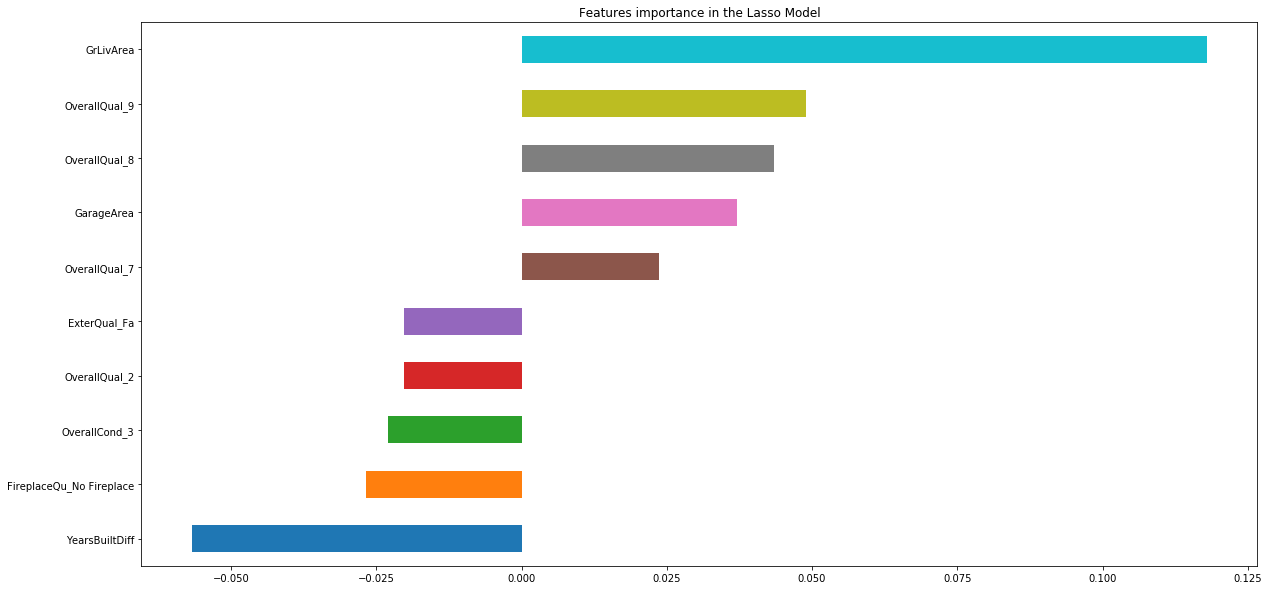

In [580]:
plt.figure(figsize=(20, 10))

lassocoefs = pd.Series(lasso.coef_, index = X.columns)
lasso_imp_coefs = pd.concat([lassocoefs.sort_values().head(),
                     lassocoefs.sort_values().tail()])
lasso_imp_coefs.plot(kind = "barh")
plt.title("Features importance in the Lasso Model")
plt.show()

# Conclusion :
The optimal lambda value in case of Ridge and Lasso is as below:
<br/>
Ridge - 100<br/>
Lasso - 0.005

The Mean Squared error in case of Ridge and Lasso are:
<br/>
Ridge - 0.0263<br/>
Lasso - 0.0262 <br/>
The Mean Squared Error of Lasso & Ridge is almost same.

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are :
 - Above grade (ground) living area square feet,
 - Garage Area, 
 - Overall quality of the house:
     - Overall quality 8,7 has the maximum positive correlation with sales price 
     - Overall quality 4,5 has the maximum negative correlation with sales price
 
 - the general zoning classification of the sale with Residential Low Density,
 - No of Fireplaces equal to  2
 - Basement quality having no basement as the value also has the maximum negative correlation with sales price
 - Total rooms above grade equal to 11  also has the maximum negative correlation with sales price
 - Age of the house has maximum negative correlation with sales price, the more the age, less the sales price<br/>
Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

# Recommendations:

#### The US Company should focus on buying more  properties with the following features:
    1. With more Above grade (ground) living area square feet,
    2. With more Garage Area, 
    3. With Overall quality of the house above 7,
    4. With the general zoning classification of the sale with Residential Low Density,
    5. With No of Fireplaces equal to  2
#### The US Company should avoid buying properties with the following features:
    1. With Overall quality of the house below 5,
    2. Basement quality having no basement,
    3. Total rooms above grade equal to 11